In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
df = pd.read_csv('./datasets/train.csv')

In [5]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [70]:
df_1st_model = df[['Lot Area',
#                    'Street',   # Removing from first model, value split of 2044 / 7
                   'Land Contour',   # Value split of 1843 / 85 / 80 / 43 
                   'Neighborhood',   
                   'Condition 1',
#                    'Condition 2',   # Removing from first model, value split of 2025 (Normal) / 26 (other values)
                   'Bldg Type', 
                   'House Style', 
                   'Overall Cond', 
                   'Year Built', 
                   'Year Remod/Add', 
                   'Exter Cond', 
#                    'Bsmt Cond',   # Removing from first model, 1834 (Typicals) / 92 (Good | Excellent) / 70 (Fair | Poor)
                   'Total Bsmt SF', 
#                    'Heating',   # Removing from first model, value split of 2018 (GasA) / 33 (other values)
                   'Gr Liv Area', 
                   'Full Bath', 
                   'Half Bath', 
                   'Bedroom AbvGr', 
                   'Kitchen Qual', 
                   'Garage Type', 
#                    'Paved Drive',   # Removing from first model, 1861 (Paved) / 39 (Partial) / 151 (Dirt/Gravel)
                   'Pool QC',   # Consider removing from first model, only 9 houses with pools
                   'SalePrice',
                   'Yr Sold'
                  ]].copy()



df_1st_model = df_1st_model.rename(columns = {'Lot Area':'lot_area',
#                                               'Street':'street', 
                                              'Land Contour':'land_cont', 
                                              'Neighborhood':'neighborhood', 
                                              'Condition 1':'cond_1', 
#                                               'Condition 2':'cond_2', 
                                              'Bldg Type':'bldg_type', 
                                              'House Style':'style', 
                                              'Overall Cond':'overall_cond', 
                                              'Year Built':'yr_built', 
                                              'Year Remod/Add':'yr_remodeled', 
                                              'Exter Cond':'exter_cond', 
#                                               'Bsmt Cond':'bsmt_cond', 
                                              'Total Bsmt SF':'bsmt_sf', 
#                                               'Heating':'heat', 
                                              'Gr Liv Area':'gr_liv_area', 
                                              'Full Bath':'full_bath', 
                                              'Half Bath':'half_bath', 
                                              'Bedroom AbvGr':'bedrooms_gr', 
                                              'Kitchen Qual':'kitch_qual', 
                                              'Garage Type':'garage_type', 
#                                               'Paved Drive':'paved_drive', 
                                              'Pool QC':'pool_qual',
                                              'SalePrice':'sale_price',
                                              'Yr Sold':'year_sold'
                                             })

In [54]:
# Used .describe() to check mean/min/max values and ensure all numerical columns weren't missing data

df_1st_model.describe()

,lot_area,overall_cond,yr_built,yr_remodeled,bsmt_sf,gr_liv_area,full_bath,half_bath,bedrooms_gr
count,2051.000000,2051.000000,2051.000000,2051.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,10065.208191,5.562165,1971.708922,1984.190151,1057.987805,1499.330083,1.577279,0.371039,2.843491
std,6742.488909,1.104497,30.177889,21.036250,449.410704,500.447829,0.549279,0.501043,0.826618
min,1300.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,0.000000,0.000000,0.000000
25%,7500.000000,5.000000,1953.500000,1964.500000,793.000000,1129.000000,1.000000,0.000000,2.000000
50%,9430.000000,5.000000,1974.000000,1993.000000,994.500000,1444.000000,2.000000,0.000000,3.000000
75%,11513.500000,6.000000,2001.000000,2004.000000,1318.750000,1728.500000,2.000000,1.000000,3.000000
max,159000.000000,9.000000,2010.000000,2010.000000,6110.000000,5642.000000,4.000000,2.000000,8.000000


In [69]:
# Used this cell to check .value_counts() for all columns

df_1st_model['year_sold'].value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: year_sold, dtype: int64

In [71]:
df_1st_model.dtypes

lot_area          int64
land_cont        object
neighborhood     object
cond_1           object
bldg_type        object
style            object
overall_cond      int64
yr_built          int64
yr_remodeled      int64
exter_cond       object
bsmt_sf         float64
gr_liv_area       int64
full_bath         int64
half_bath         int64
bedrooms_gr       int64
kitch_qual       object
garage_type      object
pool_qual        object
sale_price        int64
year_sold         int64
dtype: object

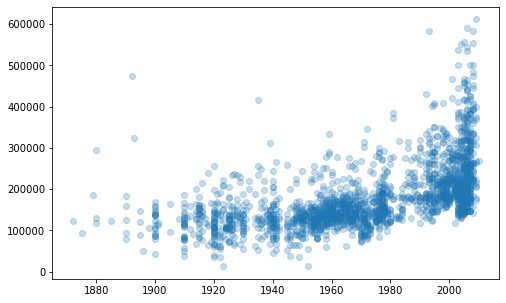

In [72]:
plt.figure(figsize=(8,5))
plt.scatter(df_1st_model['yr_built'], df_1st_model['sale_price'], alpha=.25);

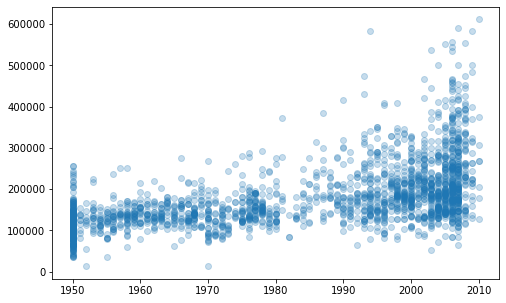

In [73]:
plt.figure(figsize=(8,5))
plt.scatter(df_1st_model['yr_remodeled'], df_1st_model['sale_price'], alpha=.25);

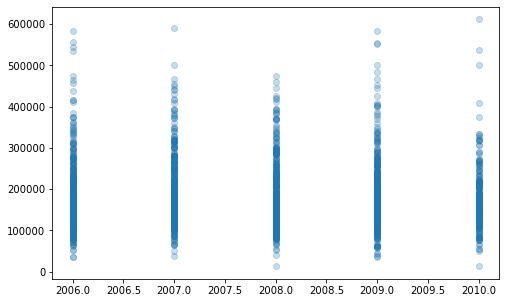

In [74]:
plt.figure(figsize=(8,5))
plt.scatter(df_1st_model['year_sold'], df_1st_model['sale_price'], alpha=.25);